In [2]:
import numpy as np
import imageio
import glob
from tqdm import tqdm_notebook as tqdm

In [24]:
import matplotlib.pyplot as plt

In [48]:
img.ravel().shape

(76800,)

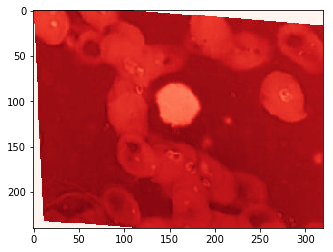

In [47]:
plt.imshow(img, cmap='Reds')

In [3]:
CELL_MONOCYTE = []

for filepath in tqdm(glob.iglob('/Volumes/microSD/COGS118a/dataset2-master/images/TRAIN/MONOCYTE/*.jpeg')):
    img = imageio.imread(filepath, as_gray=True)
    CELL_MONOCYTE.append(img.ravel())
    
for filepath in tqdm(glob.iglob('/Volumes/microSD/COGS118a/dataset2-master/images/TEST/MONOCYTE/*.jpeg')):
    img = imageio.imread(filepath, as_gray=True)
    CELL_MONOCYTE.append(img.ravel())
    
for filepath in tqdm(glob.iglob('/Volumes/microSD/COGS118a/dataset2-master/images/TEST_SIMPLE/MONOCYTE/*.jpeg')):
    img = imageio.imread(filepath, as_gray=True)
    CELL_MONOCYTE.append(img.ravel())
    
CELL_EOSINOPHIL = []

for filepath in tqdm(glob.iglob('/Volumes/microSD/COGS118a/dataset2-master/images/TRAIN/EOSINOPHIL/*.jpeg')):
    img = imageio.imread(filepath, as_gray=True)
    CELL_EOSINOPHIL.append(img.ravel())
    
for filepath in tqdm(glob.iglob('/Volumes/microSD/COGS118a/dataset2-master/images/TEST/EOSINOPHIL/*.jpeg')):
    img = imageio.imread(filepath, as_gray=True)
    CELL_EOSINOPHIL.append(img.ravel())
    
for filepath in tqdm(glob.iglob('/Volumes/microSD/COGS118a/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/*.jpeg')):
    img = imageio.imread(filepath, as_gray=True)
    CELL_EOSINOPHIL.append(img.ravel())

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [72]:
CELL_MONOCYTEa = np.array(CELL_MONOCYTE)
CELL_EOSINOPHILa = np.array(CELL_EOSINOPHIL)

In [19]:
from sklearn.decomposition import PCA

In [73]:
pca = PCA(n_components=50)
CELL_MONOCYTEt = pca.fit_transform(CELL_MONOCYTEa)

pca = PCA(n_components=50)
CELL_EOSINOPHILt = pca.fit_transform(CELL_EOSINOPHILa)

In [75]:
CELL_MONOCYTEt.shape, CELL_EOSINOPHILt.shape

((3102, 50), (3133, 50))

In [90]:
from sklearn.preprocessing import StandardScaler

In [76]:
targets = np.zeros(len(CELL_MONOCYTEt) + len(CELL_EOSINOPHILt))

targets[:len(CELL_MONOCYTEt)] = 1

data = np.vstack([CELL_MONOCYTEt, CELL_EOSINOPHILt])

In [91]:
ss = StandardScaler()

data_ss = ss.fit_transform(data)

In [94]:
np.save('/Volumes/microSD/COGS118a/CELL_data.npy', data_ss)
np.save('/Volumes/microSD/COGS118a/CELL_target.npy', targets)

In [77]:
data.shape

(6235, 50)

In [62]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(data_ss, targets, test_size=0.8, random_state=43)

In [96]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1247, 50), (4988, 50), (1247,), (4988,))

In [52]:
import xgboost as xgb

In [86]:
clf = xgb.XGBClassifier(scoring='f1')

In [97]:
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7261427425821972